# EDA of Weather Data


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [3]:
# TODO: concatenate data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = pd.concat([weather1, weather2], ignore_index=True, sort=False)
weather.to_csv("../data/weather/weather_data.csv", sep = ",", index=False, header=True)

In [4]:
# TODO: view first 5 rows of data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [5]:
# TODO: describe numeric columns
weather.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


In [6]:
# TODO: display the null values in dataframe
weather.isna().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

In [12]:
# TODO: BEGIN EDA! 6 questions
year_ticks = [2005, 2008, 2011, 2014, 2017, 2020, 2023]

## Analysis

**QUESTION 1:** How is **average temperature** changing across the **years** for Minas Gerais? Is this increasing or decreasing?

> Three main shifts can be seen. Big decline (2006-2008). Increase (2008-2019). Decline followed by a sligth recovery (2019-2023).

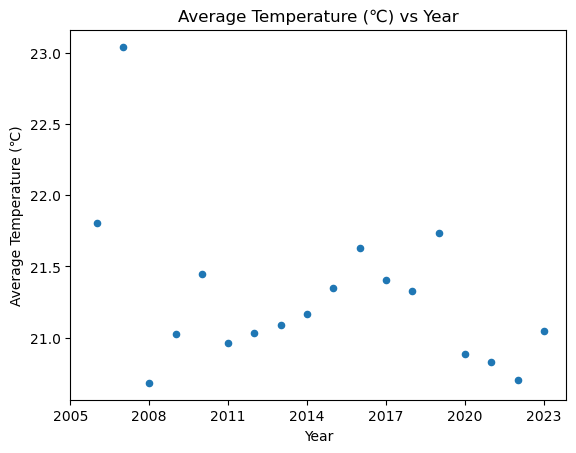

In [18]:
weather.plot(kind="scatter", x="year", y="temp_avg")
plt.xlabel("Year")
plt.ylabel("Average Temperature (℃)")
plt.title("Average Temperature (℃) vs Year")
plt.xticks(year_ticks)
plt.show()

**QUESTION 2:** How is **minimum humidity** changing across the **years** for Minas Gerais? Is this increasing or decreasing?

> Two main shifts can be seen. Big decline (2006-2007). Minimal downward deviations from 48 that recover (2007-2023).

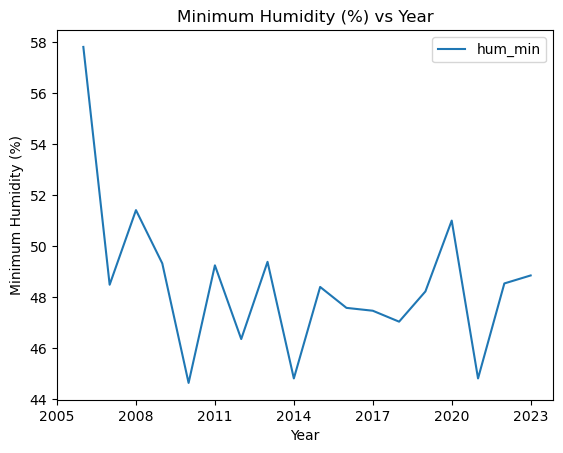

In [20]:
weather.plot(kind="line", x="year", y="hum_min")
plt.xlabel("Year")
plt.ylabel("Minimum Humidity (%)")
plt.title("Minimum Humidity (%) vs Year")
plt.xticks(year_ticks)
plt.show()

**QUESTION 3:** How is **average wind speed** changing across the **years** for Minas Gerais? Is this increasing or decreasing?

> Steady decrease that was more accelerated early on (2006-2008) that has slowed down more recently (2017-2023).

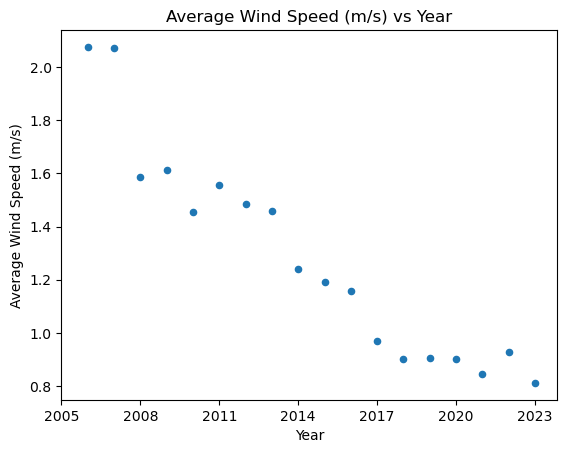

In [24]:
weather.plot(kind="scatter", x="year", y="wind_avg")
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (m/s)")
plt.title("Average Wind Speed (m/s) vs Year")
plt.xticks(year_ticks)
plt.show()

**QUESTION 4:** Which **year** had the highest **maximum rainfall** recorded?

> 2006 had the highest rainfall.

In [33]:
max_rain = weather["rain_max"].max()
max_year = weather[weather["rain_max"] == max_rain].year
print(max_year)

0    2006
Name: year, dtype: int64


**QUESTION 5:** What is the relationship between **max rain** and **max humidity**? How *strong* is this relationship? Use pearson's correlation coefficient.

> Scatter plot has a positive linear relationship. Pearson coefficient of 0.41 is moderately positive but flawed. Scatter plot has two potential outliers and neither variable is normally distributed.

0.4057821680144417


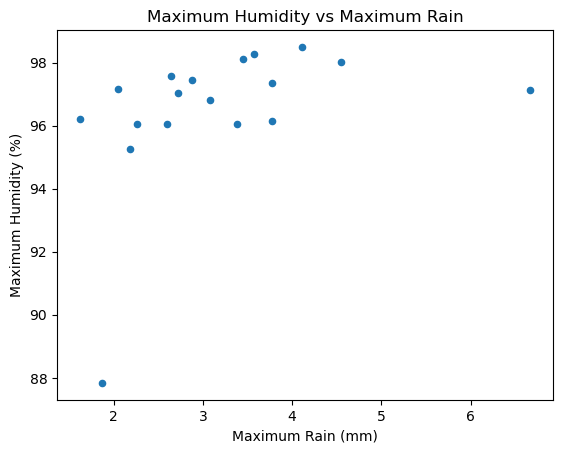

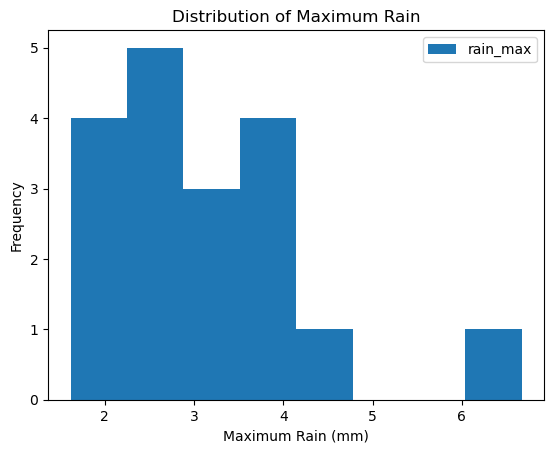

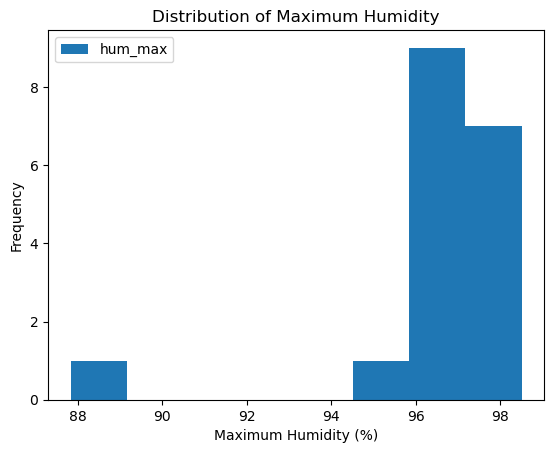

In [32]:
rain_humidity = weather["rain_max"].corr(weather["hum_max"])
print(rain_humidity)

weather.plot(kind="scatter", x="rain_max", y="hum_max")
plt.xlabel("Maximum Rain (mm)")
plt.ylabel("Maximum Humidity (%)")
plt.title("Maximum Humidity vs Maximum Rain")
plt.show()

weather.plot(kind="hist", y="rain_max", bins=8)
plt.xlabel("Maximum Rain (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Maximum Rain")
plt.show()

weather.plot(kind="hist", y="hum_max", bins=8)
plt.xlabel("Maximum Humidity (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Maximum Humidity")
plt.show()

**QUESTION 6:** What is the relationship between **average wind speed** and **average temperature**? How *strong* is this relationship? Use pearson's correlation coefficient.

> Scatter plot lacks a linear relationship. Pearson coefficient of 0.48 is moderately positive but flawed. Scatter plot outlier (2+, 23+) has likely influence, and neither variable is normally distributed.

0.4765294973950927


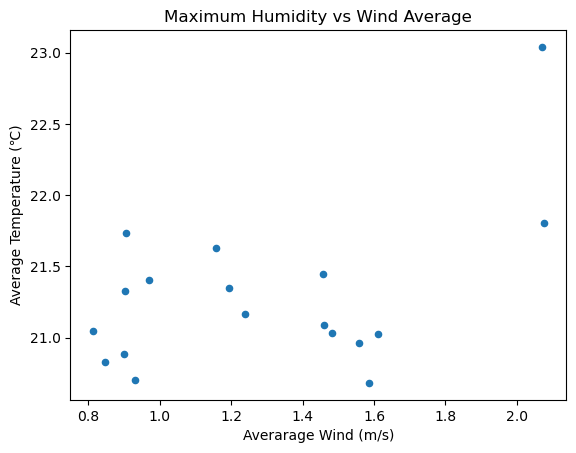

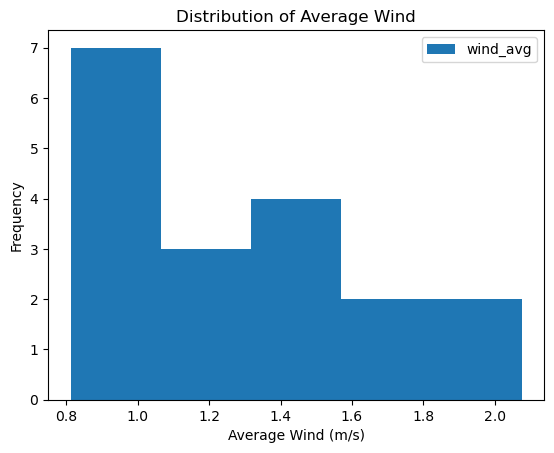

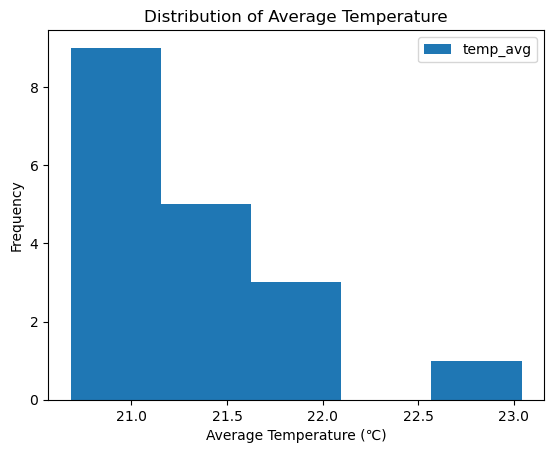

In [36]:
wind_temp = weather["wind_avg"].corr(weather["temp_avg"])
print(wind_temp)

weather.plot(kind="scatter", x="wind_avg", y="temp_avg")
plt.xlabel("Averarage Wind (m/s)")
plt.ylabel("Average Temperature (℃)")
plt.title("Maximum Humidity vs Wind Average")
plt.show()

weather.plot(kind="hist", y="wind_avg", bins=5)
plt.xlabel("Average Wind (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Wind")
plt.show()

weather.plot(kind="hist", y="temp_avg", bins=5)
plt.xlabel("Average Temperature (℃)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Temperature")
plt.show()